In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

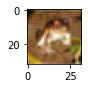

In [7]:
plot_sample(0)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
classes[y_train[0][0]]

'frog'

In [12]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [19]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
#these values of y_train are hot encoded ( it means in the whole class only that value is one and other will remain zero)

In [10]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes = 10,dtype = 'float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
y_test_categorical = keras.utils.to_categorical(y_test,num_classes = 10,dtype = 'float32')

In [23]:
#loss function 'categorical-crossentropy' is used because values of y_test are hot encoded
#if we just have categorical values in place of hot encoded values we use 'sparse_categorical_crossentropy' 

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 148s 94ms/step - loss: 2.1936 - accuracy: 0.2752
Epoch 2/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.6923 - accuracy: 0.3957
Epoch 3/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.5910 - accuracy: 0.4274
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.5379 - accuracy: 0.4456s - loss: 1.5379 - accuracy
Epoch 5/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4931 - accuracy: 0.4649
